Problem description:
The weather data (March - July 2020) from four different locations (Arizona, Florida, New York, and Washington)  in the United States with varying climatic conditions is utilized to assess effect of weather parameters on the COIVD-19 spread.  
Objective: Cluster the data using K-means algorithm. 

# Import the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

# Load the Dataset

In [ ]:
df = pd.read_csv("COVID-19_Weather.csv")
df.head()

,STATE,DATE,CASES,CASES_PER_DAY,DEATHS,RECOVERED,AVG_TEMP,DEWP,WDSP,MAX_TEMP,MIN_TEMP,PRCP,DAILY_AQI,PM
0,Arizona,3/10/2020,6,6,0,1,67.4,44.6,3.0,75.0,53.1,0.01,17,4.0
1,Arizona,3/11/2020,9,3,0,1,62.5,58.7,1.7,73.9,60.1,0.21,14,3.4
2,Arizona,3/12/2020,9,0,0,1,64.7,60.1,1.4,71.1,59.0,0.74,21,5.1
3,Arizona,3/13/2020,9,0,0,1,58.5,50.5,4.1,71.1,51.1,0.83,12,2.8
4,Arizona,3/14/2020,12,3,0,1,57.1,47.0,3.7,72.0,48.0,0.38,17,4.1


# Exploratory Data Analysis

In [ ]:
print("type before converting: ",df['DATE'].dtype)
df['DATE']=pd.to_datetime(df['DATE'])   #use pd.to_datetime() to convert the column into type datetime
print("type before converting: ",df['DATE'].dtype)

#some values in the column 'CASES_PER_DAY' are negative, we will only consider positive values for our analysis.
df=df[df['CASES_PER_DAY']>=0]    

type before converting:  object
type before converting:  datetime64[ns]


Text(0.5, 1.0, 'Washington')

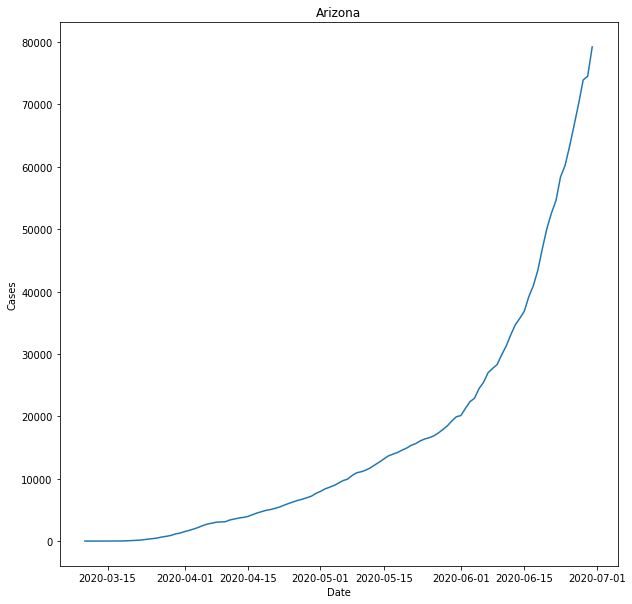

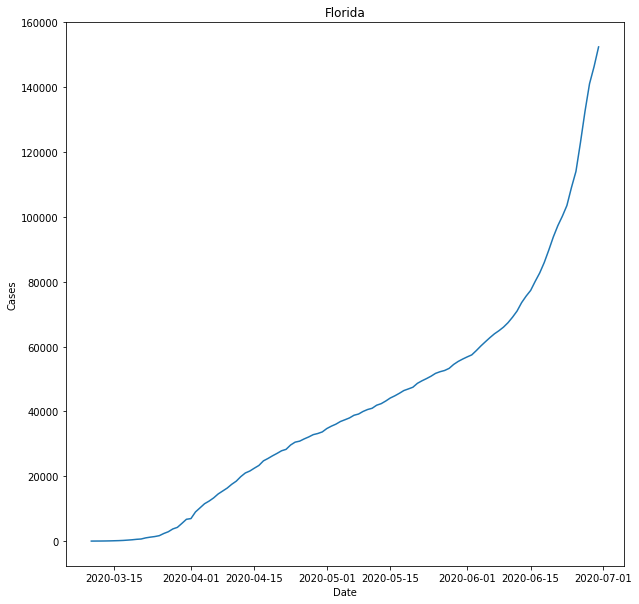

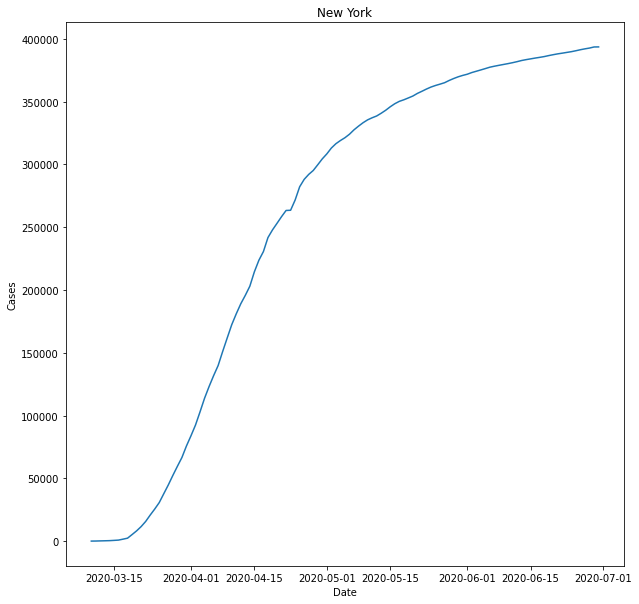

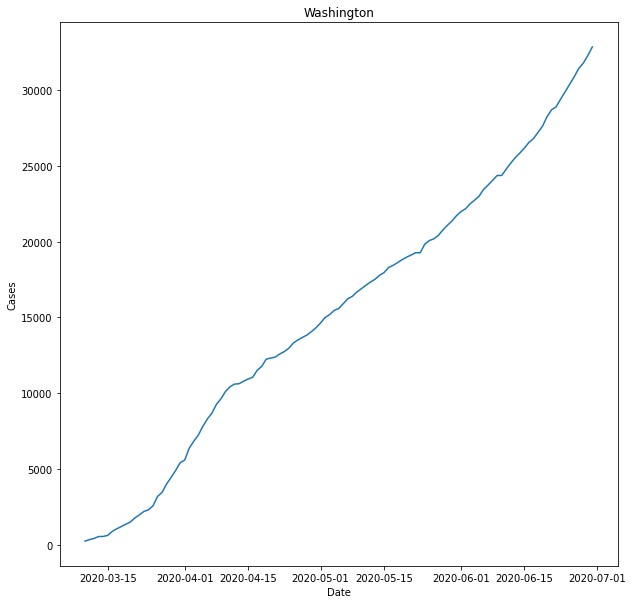

In [ ]:
# plot of 'CASES' vs 'DATE' for every state 
data_Arizona = df[df['STATE']=='Arizona'] # create a new DataFrame for all data of Arizona
plt.figure(figsize=(10,10)) #define tbe size of the figure
plt.plot(data_Arizona['DATE'],data_Arizona['CASES']) #plot the timeseries of date vs number of cases.
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Arizona")

data_Florida = df[df['STATE']=='Florida'] # create a new DataFrame for all data of Florida
plt.figure(figsize=(10,10))
plt.plot(data_Florida['DATE'],data_Florida['CASES'])
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Florida")

data_NY = df[df['STATE']=='New York'] # create a new DataFrame for all data of New York
plt.figure(figsize=(10,10))
plt.plot(data_NY['DATE'],data_NY['CASES'])
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("New York")

data_Washington = df[df['STATE']=='Washington'] # create a new DataFrame for all data of Washington
plt.figure(figsize=(10,10))
plt.plot(data_Washington['DATE'],data_Washington['CASES'])
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Washington")

Text(0, 0.5, 'frequency')

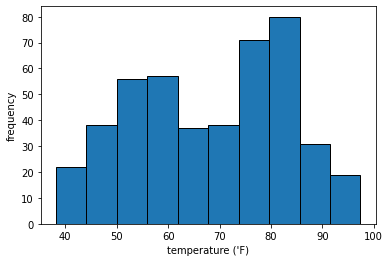

In [ ]:
#plot histogram of average temeprature and windspeed
plt.hist(df['AVG_TEMP'],edgecolor="black")
plt.xlabel("temperature ('F)")
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

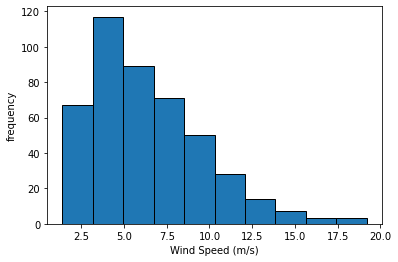

In [ ]:
plt.hist(df['WDSP'],edgecolor="black")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel('frequency')

Text(0, 0.5, 'Cases per day')

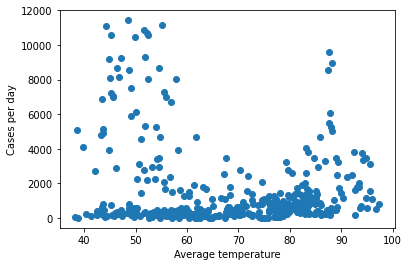

In [ ]:
# scatter plot of total number of daily cases vs average temperature

plt.scatter(df['AVG_TEMP'],df['CASES_PER_DAY'])
plt.xlabel("Average temperature")
plt.ylabel("Cases per day")

Text(0, 0.5, 'Cases per day')

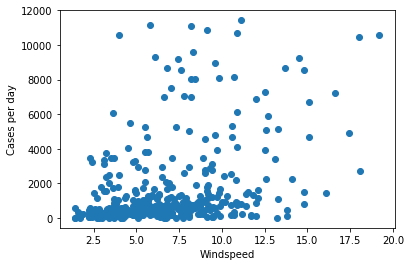

In [ ]:
# scatter plot of total number of daily cases vs wind speed
plt.scatter(df['WDSP'],df['CASES_PER_DAY'])
plt.xlabel("Windspeed")
plt.ylabel("Cases per day")

# Clustering of temperature and number of daily cases data using K-Means clustering

In [ ]:
# create new data with only cases per day and average temperature
# we wish to cluster the dataset with respect to cases per day and average temperature

data = df[['AVG_TEMP','CASES_PER_DAY']]
data.head()

,AVG_TEMP,CASES_PER_DAY
0,67.4,6
1,62.5,3
2,64.7,0
3,58.5,0
4,57.1,3


In [ ]:
# get statistical information regarding the dataset
data.describe()

,AVG_TEMP,CASES_PER_DAY
count,449.000000,449.000000
mean,68.439866,1465.837416
std,14.853733,2296.907618
min,38.200000,0.000000
25%,55.600000,245.000000
50%,69.600000,559.000000
75%,81.100000,1371.000000
max,97.400000,11434.000000


Data Standardization

In [ ]:
# before applying K-Means algorithm on the dataset, we need to standardize the dataset. 

from sklearn.preprocessing import StandardScaler  #import the StandardScaler function
min_max_scaler = StandardScaler() #define an instance of StandardScaler
np_scaled = min_max_scaler.fit_transform(data)  #scale the dataframe
data_scaled = pd.DataFrame(np_scaled)  #convert the scaled input to a DataFrame variable

In [ ]:
data_scaled

,0,1
0,-0.070085,-0.636275
1,-0.400337,-0.637583
2,-0.252060,-0.638891
3,-0.669929,-0.638891
4,-0.764287,-0.637583
...,...,...
444,0.152329,-0.426194
445,-0.440775,-0.399607
446,-0.696889,-0.487213
447,-0.400337,-0.420528


Determining the appropriate K value

Text(0, 0.5, 'sum of squares')

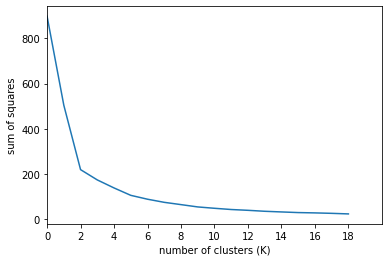

In [ ]:
# calculate the within cluster sum of squares for different number of centroids to generate the sum of squares plot.

from sklearn.cluster import KMeans  #import KMeans library from sklearn

scores=[]   #define an empty list to store the sum of squares for each K value
for i in range(1,20): # select K value from 1 to 20
  k_means = KMeans(n_clusters=i,max_iter=300)  #define the KMeans instance
  '''
  n_clusters = number of clusters (K)
  max_iter = maximum number of iterations for the KMeans algorithm before stopping
  '''

  k_means.fit(data_scaled)   # form the clusters
  scores.append(k_means.inertia_) #k_means.inertia_ returns the within cluster sum of squares 

#plot the scores vs K
plt.plot(scores)
plt.xlim(0, 20)
plt.xticks(np.arange(0, 20, 2))
plt.xlabel('number of clusters (K)')
plt.ylabel('sum of squares')

Performing K-Means algorithm on the dataset

In [ ]:
# choose K=5 (Although the sum of squares is high for K=5, we use this value just for better visibility of clusters)
k_means = KMeans(n_clusters=5,max_iter=1000)  #define the KMeans instance
k_means.fit(data_scaled)  # form the clusters

#create a new column in the dataframe 'data' with elements as the respective clusters
data['cluster']=k_means.predict(data_scaled)
data['cluster'].value_counts()  #get the number of elements in each cluster

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


3    175
0    107
4    104
2     37
1     26
Name: cluster, dtype: int64

In [ ]:
data.head()

,AVG_TEMP,CASES_PER_DAY,cluster
0,67.4,6,4
1,62.5,3,4
2,64.7,0,4
3,58.5,0,4
4,57.1,3,0


Visualizing K-Means result

Text(0, 0.5, 'Daily cases')

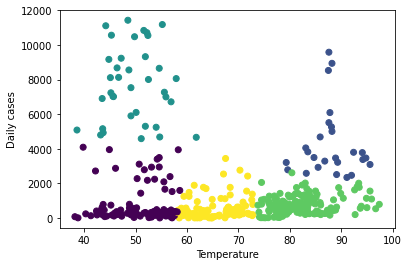

In [ ]:
# create a scatterplot of average temperature vs cases per day 
# The points are colored according to the clusters assigned.
plt.scatter(data['AVG_TEMP'],data['CASES_PER_DAY'],c=data['cluster']) 
plt.xlabel("Temperature")
plt.ylabel("Daily cases")

# K-Means using all the features

In [ ]:
# create new dataset with all the variables except 'DATE' and 'STATE'
data = df[['AVG_TEMP','WDSP','PRCP'	,'DAILY_AQI',	'PM','CASES_PER_DAY']]

np_scaled = min_max_scaler.fit_transform(data)  #scale the dataframe
data_scaled = pd.DataFrame(np_scaled)  #convert the scaled input to a DataFrame variable

Text(0, 0.5, 'sum of squares')

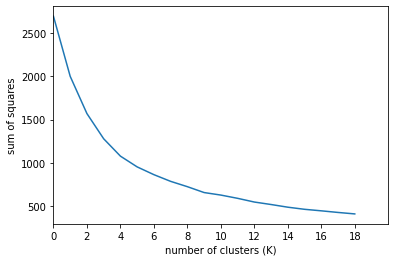

In [ ]:
scores=[]   #define an empty list to store the sum of squares for each K value
for i in range(1,20): # select K value from 1 to 20
  k_means = KMeans(n_clusters=i,max_iter=300,random_state=48)  #define the KMeans instance
  '''
  n_clusters = number of clusters (K)
  max_iter = maximum number of iterations for the KMeans algorithm before stopping
  '''

  k_means.fit(data_scaled)   # form the clusters
  scores.append(k_means.inertia_) #k_means.inertia_ returns the sum of square of distance of data points from the cluster center

#plot the scores vs K
plt.plot(scores)
plt.xlim(0, 20)
plt.xticks(np.arange(0, 20, 2))
plt.xlabel('number of clusters (K)')
plt.ylabel('sum of squares')

In [ ]:
# choose K=3 
k_means = KMeans(n_clusters=3,max_iter=500,random_state=10)  #define the KMeans instance. Initialize a random state for reproducility
k_means.fit(data_scaled)  

#create a new column in the dataframe 'data' with elements as the respective clusters
data['cluster']=k_means.predict(data_scaled)
data['cluster'].value_counts()  #get the number of elements in each cluster

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    200
0    200
2     49
Name: cluster, dtype: int64

In [ ]:
cluster1 = data[data['cluster']==0]
cluster1
# we can see that for moderate temperatures,low wind speed and low AQI, the number of cases is relatively low

,AVG_TEMP,WDSP,PRCP,DAILY_AQI,PM,CASES_PER_DAY,cluster
0,67.4,3.0,0.01,17,4.0,6,0
1,62.5,1.7,0.21,14,3.4,3,0
3,58.5,4.1,0.83,12,2.8,0,0
4,57.1,3.7,0.38,17,4.1,3,0
7,64.9,2.8,0.00,16,3.9,2,0
...,...,...,...,...,...,...,...
447,70.7,3.6,0.00,12,2.8,488,0
448,61.9,4.1,0.00,6,1.4,549,0
449,58.1,3.8,0.41,8,1.8,348,0
450,62.5,5.0,0.09,13,3.0,501,0


In [ ]:
print("number of days having daily cases > 300:")
len(cluster1[cluster1['CASES_PER_DAY']>300])

number of days having daily cases > 300:


102

In [ ]:
cluster1.describe()

,AVG_TEMP,WDSP,PRCP,DAILY_AQI,PM,CASES_PER_DAY,cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0
mean,62.187000,6.021000,0.078850,11.475000,2.746000,559.750000,0.0
std,11.572504,2.675077,0.347987,5.431101,1.309948,704.044809,0.0
min,38.200000,1.400000,0.000000,0.000000,-0.600000,0.000000,0.0
25%,53.975000,3.800000,0.000000,8.000000,1.800000,163.750000,0.0
50%,59.300000,5.700000,0.000000,11.000000,2.600000,311.500000,0.0
75%,71.450000,7.700000,0.022500,16.000000,3.800000,616.500000,0.0
max,91.100000,13.800000,4.390000,25.000000,5.900000,3822.000000,0.0


In [ ]:
cluster2 = data[data['cluster']==1]
cluster2
#we can see that for moderate temperatures,low wind speed and high AQI, the number of cases is higher as
#compared to cluster 1. 

,AVG_TEMP,WDSP,PRCP,DAILY_AQI,PM,CASES_PER_DAY,cluster
2,64.7,1.4,0.74,21,5.1,0,1
5,62.0,1.4,0.00,25,5.9,1,1
6,64.3,2.7,0.00,22,5.2,5,1
11,61.9,2.9,0.00,28,6.6,40,1
12,62.0,2.2,0.00,25,6.0,34,1
...,...,...,...,...,...,...,...
349,49.5,2.3,0.00,45,10.7,148,1
350,48.4,3.1,0.00,41,9.9,269,1
368,50.2,3.6,0.00,28,6.6,584,1
369,53.5,3.6,0.00,28,6.8,363,1


In [ ]:
print("number of days having daily cases > 300:")
len(cluster2[cluster2['CASES_PER_DAY']>300])

number of days having daily cases > 300:


150

In [ ]:
cluster2.describe()

,AVG_TEMP,WDSP,PRCP,DAILY_AQI,PM,CASES_PER_DAY,cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0
mean,78.920500,5.460000,0.117000,27.720000,6.663000,1062.115000,1.0
std,10.906944,2.705791,0.591512,8.387691,2.078855,1217.637271,0.0
min,42.500000,1.400000,0.000000,16.000000,3.900000,0.000000,1.0
25%,75.675000,3.275000,0.000000,22.000000,5.200000,304.250000,1.0
50%,81.200000,5.000000,0.000000,25.500000,6.150000,680.500000,1.0
75%,85.325000,7.125000,0.000000,31.250000,7.525000,1215.250000,1.0
max,97.400000,14.800000,7.080000,61.000000,16.700000,8530.000000,1.0


In [ ]:
cluster3 = data[data['cluster']==2]
cluster3
#for low temperatures,high wind speed and high Air Quality Index, the cases are relatively high

,AVG_TEMP,WDSP,PRCP,DAILY_AQI,PM,CASES_PER_DAY,cluster
221,88.2,9.6,0.00,25,6.0,8942,2
222,87.6,8.3,0.00,33,7.8,9585,2
235,46.1,9.3,1.00,20,4.9,2870,2
237,54.2,13.1,0.00,20,4.9,3400,2
238,39.8,10.9,0.00,21,5.0,4090,2
239,38.6,12.6,0.00,19,4.5,5084,2
240,43.2,9.6,1.44,15,3.7,4797,2
241,43.6,13.3,0.00,16,3.9,5160,2
242,45.6,7.8,0.01,23,5.4,7036,2
243,55.9,6.6,0.00,19,4.6,6999,2
